In [2]:
# from keras.models import Sequential
# from keras.layers import Dense
from os.path import expanduser as ospath
# from keras.wrappers.scikit_learn import KerasRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from joblib.numpy_pickle import pickle as pkl

from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score

from datetime import datetime

today = datetime.now().strftime("%d/%m/%Y_%H:%M:%S")

In [3]:
PATH = './processed_dataset/'
x_train = pd.read_csv(PATH+'x_train_scaled.csv')
x_test = pd.read_csv(PATH+'x_test_scaled.csv')
y_train = pd.read_csv(PATH+'y_train.csv')
y_test = pd.read_csv(PATH+'y_test.csv')

In [4]:
x_train.head()

ALogP    ALogp2       AMR      apol  naAromAtom  nAromBond     nAtom  \
0  1.000000  1.000000  0.698321  0.349157    0.000000   0.000000  0.416667   
1  0.877823  0.801201  0.279107  0.405244    0.545455   0.500000  0.458333   
2  0.616314  0.447374  0.184408  0.328538    0.545455   0.500000  0.375000   
3  0.124158  0.046470  0.614890  1.000000    1.000000   1.000000  1.000000   
4  0.444537  0.268129  0.429479  0.347312    0.454545   0.416667  0.333333   

   nHeavyAtom        nH   nC  ...        MW       AMW    WTPT-1    WTPT-3  \
0    0.461538  0.363636  0.3  ...  0.447077  0.339384  0.439183  0.774031   
1    0.384615  0.545455  0.4  ...  0.335490  0.196407  0.366552  0.466421   
2    0.153846  0.636364  0.4  ...  0.056212  0.060558  0.150017  0.004799   
3    1.000000  1.000000  1.0  ...  1.000000  0.127091  1.000000  0.854960   
4    0.307692  0.363636  0.3  ...  0.378679  0.397127  0.293293  0.468946   

     WTPT-4    WTPT-5     WPATH      WPOL     XLogP    Zagreb  
0  0.948941  0.484117  0.341672  0.500000  0.013210  0.441176  
1  0.458328  0.477376  0.248932  0.461538  0.520688  0.382353  
2  0.000000  0.239106  0.086028  0.192308  0.601446  0.147059  
3  0.739443  0.762089  1.000000  1.000000  0.409023  1.000000  
4  0.226681  0.235171  0.231239  0.230769  0.157527  0.294118  

[5 rows x 436 columns]

In [5]:
x_test.head()

ALogP    ALogp2       AMR      apol  naAromAtom  nAromBond     nAtom  \
0  1.000000  1.000000  0.175750  0.014437    0.454545   0.416667  0.000000   
1  0.595517  0.437410  0.823832  0.223685    0.000000   0.000000  0.238095   
2  0.972969  0.955706  1.000000  0.439209    0.000000   0.000000  0.523810   
3  0.433486  0.272294  0.520248  0.327532    0.454545   0.416667  0.428571   
4  0.333299  0.187444  0.430954  0.249176    0.454545   0.416667  0.238095   

   nHeavyAtom   nH        nC  ...        MW       AMW    WTPT-1    WTPT-3  \
0    0.083333  0.0  0.000000  ...  0.216400  0.746318  0.071913  0.536681   
1    0.250000  0.3  0.222222  ...  0.397204  0.468312  0.231475  0.534537   
2    0.500000  0.6  0.444444  ...  0.542017  0.158944  0.472779  0.721714   
3    0.333333  0.6  0.333333  ...  0.373411  0.094365  0.314130  0.571505   
4    0.166667  0.4  0.222222  ...  0.288892  0.308754  0.155356  0.372333   

     WTPT-4    WTPT-5     WPATH      WPOL     XLogP   Zagreb  
0  0.466244  0.008823  0.029431  0.086957  0.444982  0.09375  
1  0.499121  0.023582  0.185541  0.217391  0.107131  0.25000  
2  1.000000  0.024167  0.392194  0.521739  0.000000  0.46875  
3  0.807552  0.000062  0.220729  0.304348  0.520813  0.31250  
4  0.230626  0.003249  0.122201  0.043478  0.306228  0.15625  

[5 rows x 436 columns]

In [6]:
y_train.head()

pIC
0  5.682982
1  6.035740
2  5.700929
3  5.247644
4  5.590913

In [7]:
y_test.head()

pIC
0  5.692718
1  5.384471
2  5.402634
3  5.807711
4  5.822175

In [8]:
model = LinearRegression()

In [9]:
class GeneticAlgorithm():
    def __init__(self, model, popsize, max_feat, pred_type, iter_=50, seed=5):
        self.model = model
        self.popsize = popsize
        self.max_feat = max_feat
        self.seed = seed
        if self.seed != None:
            self.rng = np.random.RandomState(seed)
        self.iter_ = iter_
        self.pred_type = pred_type
        
    def popinit(self,X):
        nfeat = X.shape[1]
        listpop = []
        for i in range(self.popsize):
            if i == 0:
                if self.seed != None:
                    pop_ = self.rng.choice(nfeat, self.max_feat, replace=False)
                else:
                    pop_ = np.random.choice(nfeat, self.max_feat, replace=False)
                pop_ = list(pop_)
                pop_.sort()
                listpop.append(pop_)
            else:
                if self.seed != None:
                    pop_ = self.rng.choice(nfeat, self.max_feat, replace=False)
                else:
                    pop_ = np.random.choice(nfeat, self.max_feat, replace=False)
                pop_ = list(pop_)
                pop_.sort()
                while (pop_ in listpop):
                    if self.seed != None:
                        pop_ = self.rng.choice(nfeat, self.max_feat, replace=False)
                    else:
                        pop_ = np.random.choice(nfeat, self.max_feat, replace=False)
                    pop_ = list(pop_)
                    pop_.sort()
                listpop.append(pop_)
        return listpop
        
    def fitness(self,pop,x,y):
        if self.pred_type == "classification":
            scoring = "neg_log_loss"
        elif self.pred_type == "regression":
            scoring = "neg_mean_squared_error"
        save_fit = []; save_score = []
        for i in range(len(pop)):
            x_slice = x.iloc[:,pop[i]]
            score_ = cross_val_score(self.model, x_slice, y, cv=10, scoring=scoring)
            score_ = -np.average(score_)
            fitness = 1/score_
            save_fit.append(fitness)
            save_score.append(score_)
        return save_fit, save_score
    
    def parent_select(self, pop, fit):
        sum_fit = np.sum(fit)
        prob = [x/sum_fit for x in fit]
        prob_range = []
        sum_ = 0
        for i in range(len(prob)):
            sum_ += prob[i]
            prob_range.append(sum_)
        # select first parent
        for i in range(len(prob)):
            if self.seed != None:
                rand = self.rng.rand()
            else:
                rand = np.random.rand()
            if rand <= prob_range[i]:
                parent_1 = pop[i]
                break
        # select second parent
        parent_2 = parent_1
        while (parent_2 == parent_1):
            for i in range(len(prob)):
                if self.seed != None:
                    rand = self.rng.rand()
                else:
                    rand = np.random.rand()
                if rand <= prob_range[i]:
                    parent_2 = pop[i]
                    break
        return parent_1, parent_2
    
    def cross_over(self, parent_1, parent_2):
        point = len(parent_1) - 1
        point_list = list(range(point))
        point_list = [x+1 for x in point_list]
        if self.seed != None:
            point_sel = self.rng.choice(point_list, 1)[0]
        else:
            point_sel = np.random.choice(point_list, 1)[0]
        child_1 = parent_1[:point_sel] + parent_2[point_sel:]
        child_2 = parent_2[:point_sel] + parent_1[point_sel:]
        return child_1, child_2
    
    def feat_sel(self,max_feat_list,child):
        feat_sel_child = set(max_feat_list).difference(set(child))
        feat_sel_child = list(feat_sel_child)
        return feat_sel_child
    
    def mutation(self, child_1, child_2, x):
        max_feat_list = list(range(x.shape[1]))
        for i in range(len(child_1)):
            if self.seed != None:
                rand_1 = self.rng.rand()
                rand_2 = self.rng.rand()
            else:
                rand_1 = np.random.rand()
                rand_2 = np.random.rand()
            if rand_1 <= 0.01:
                feat_sel_child = self.feat_sel(max_feat_list,child_1)
                if self.seed != None:
                    new_feat = self.rng.choice(feat_sel_child, 1)[0]
                else:
                    new_feat = np.random.choice(feat_sel_child, 1)[0]
                child_1[i] = new_feat
            if rand_2 <= 0.01:
                feat_sel_child = self.feat_sel(max_feat_list,child_2)
                if self.seed != None:
                    new_feat = self.rng.choice(feat_sel_child, 1)[0]
                else:
                    new_feat = np.random.choice(feat_sel_child, 1)[0]
                child_2[i] = new_feat
        return child_1, child_2
    
    def sort(self, pop, fit, score):
        tmp_dict = {'fitness': fit}
        df = pd.DataFrame(tmp_dict)
        df.reset_index(inplace=True)
        df.sort_values('fitness', ascending=False, inplace=True)
        idx_ = df.index.values.tolist()
        fit = df['fitness'].values.tolist()
        new_pop = []; new_score = []
        for i in idx_:
            new_pop.append(pop[i])
            new_score.append(score[i])
        return new_pop, fit, new_score
    
    def fit(self,x,y):
        fit_avg = []; score_avg = []
        pop = self.popinit(x)
        fitness, score = self.fitness(pop,x,y)
        pop, fitness, score = self.sort(pop, fitness, score)
        for i in range(self.iter_):
            parent_1, parent_2 = self.parent_select(pop, fitness)
            child_1, child_2 = self.cross_over(parent_1, parent_2)
            child_1, child_2 = self.mutation(child_1, child_2, x)
            child_fitness, child_score = self.fitness([child_1, child_2],x,y)
            pop[-1] = child_1; pop[-2] = child_2
            fitness[-1] = child_fitness[0]; fitness[-2] = child_fitness[1]
            score[-1] = child_score[0]; score[-2] = child_score[1]
            pop, fitness, score = self.sort(pop, fitness, score)
            fit_avg.append(np.average(fitness)) 
            score_avg.append(np.average(score)) 
#         idx_ = np.argmax(fitness)
        best_pop = pop[0]
        best_fit = fitness[0]
        best_score = score[0]
        col_name = x.columns.values
        best_feat = col_name[best_pop]
        best_feat = list(best_feat)
        return score_avg, best_score, best_feat
            

In [10]:
# featSelection = GeneticAlgorithm(model=model, popsize=10, max_feat=5, pred_type="regression", iter_=50, seed=None)
# score_avg, best_score, best_feat = featSelection.fit(x_train,y_train)
# print(best_feat)
# print(best_score)

num_feat = [5,6,7,8,9,10]
x=[]

for i in range(len(num_feat)):
    featSelection = GeneticAlgorithm(model=model, popsize=10, max_feat=num_feat[i], pred_type="regression", iter_=50, seed=None)
    score_avg, best_score, best_feat = featSelection.fit(x_train,y_train)
    print(f'\nNum_feat: {num_feat[i]}')
    print(best_score)
    print(score_avg)
    print(best_feat)
    x.append([best_score,score_avg,best_feat])
    
f = open(f'test_model_-_2_universal_model.data','wb')
pkl.dump(x,f)
f.close()
# print(best_feat)


Num_feat: 5
0.032743387962705754
[0.04882783856418151, 0.04818582316046389, 0.044966713517969104, 0.0430707113317648, 0.04393233319914898, 0.04215793306762335, 0.040789833900765106, 0.040724154614950756, 0.03962216451526472, 0.03908845965913752, 0.03895577082593156, 0.03894729121582081, 0.038938811605710055, 0.0389303319955993, 0.0389303319955993, 0.0389303319955993, 0.0389303319955993, 0.0389303319955993, 0.0389303319955993, 0.0389303319955993, 0.0389303319955993, 0.0389303319955993, 0.0389303319955993, 0.0389303319955993, 0.0389303319955993, 0.0389303319955993, 0.0389303319955993, 0.0389303319955993, 0.0389303319955993, 0.0389303319955993, 0.0389303319955993, 0.0389303319955993, 0.0389303319955993, 0.0389303319955993, 0.0389303319955993, 0.04003100482498959, 0.0389303319955993, 0.0389303319955993, 0.0389303319955993, 0.0389303319955993, 0.0389303319955993, 0.0389303319955993, 0.0389303319955993, 0.0389303319955993, 0.0389303319955993, 0.0389303319955993, 0.0389303319955993, 0.038930

In [16]:
arr_best_score = []
# for i in range(len(num_feat)):
f = open(f'test_model_-_2_universal_model.data','rb')
arr_best_score = (pkl.load(f))
f.close()

# print(arr_best_score)
df_best_score = pd.DataFrame(arr_best_score, num_feat)
df_best_score.sort_values(by=0,ascending=False)

0                                                  1  \
10  0.033707  [0.06042413186077278, 0.059945522830965846, 0....   
8   0.033478  [0.062028181916023474, 0.056358705668300105, 0...   
5   0.032743  [0.04882783856418151, 0.04818582316046389, 0.0...   
9   0.029734  [0.059174584368945383, 0.05408727486649774, 0....   
7   0.028230  [0.048706677889505286, 0.047278439122546034, 0...   
6   0.027305  [0.05307193252287741, 0.048569598865637886, 0....   

                                                    2  
10  [ATS0v, maxsF, VP-1, nHother, nsCH3, maxsOH, S...  
8   [ALogp2, ATS1p, ATSC1v, nHBa, minaasN, SpMAD_D...  
5                 [AMR, ATS0p, SpAbs_Dzp, ATSC8m, MW]  
9   [ATS7m, ATS1i, AATS6i, SpMax_Dzp, SP-5, minaas...  
7   [VR1_Dzi, ATS2e, ATS5p, AATS7i, ATSC6m, AATSC8...  
6   [nBondsD2, SpAbs_DzZ, SssS, maxdsN, MLFER_L, A...

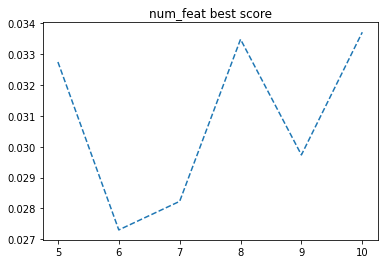

In [18]:
ax = plt.Figure(figsize=(20,60))
ax = plt.title('num_feat best score')
ax = plt.plot(df_best_score.iloc[:,0], linestyle='--')
ax

In [ ]:
# print(score_avg)

In [ ]:
# import sklearn
# sklearn.metrics.SCORERS.keys()

In [ ]:
# print(best_feat)

In [ ]:
# print(best_score)

In [ ]:
# print(fit_avg)